Material basado en el curo "Advanced Deep Learning and Reinforcement Learning" de UCL:



*   https://youtu.be/JO0LwmIlWw0
*   https://github.com/enggen/DeepMind-Advanced-Deep-Learning-and-Reinforcement-Learning/blob/master/lecture%20slides/dl_02%20Introduction%20to%20TensorFlow.pdf

**Nota**: actualmente(2022) este notebook se esta actualizando para contener 
nuevo codigo en la version mas reciente de tf(version2), durante este tiempo el notebook se encuentra "inestable" y propenso a errores.


In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


La siguiente celda habilita la retro-compatibilidad con tf1, si vas a correr el codigo de tf1 hay que descomentar el codigo.

In [ ]:
#if tf.__version__.startswith("2."):
#  import tensorflow.compat.v1 as tf
#  tf.compat.v1.disable_v2_behavior()
#  tf.compat.v1.disable_eager_execution()
#  print("Enabled compatitility to tf1.x")

## TensorFlow : La idea base

TensorFlow esta compuesto principalmente de 2 partes :

*   **Librería para definir grafos de computo** : la API de TensorFlow 
*   **Motor de ejecución** : ejecutar los grafos mencionados en gran variedad de hardware.

Entre muchas de sus ventajas podemos mencionar algunas importantes:



*   Rica librería de operaciones y funciones comunes en data science ,especialmente en machine learning.
*   **Autograd/autodiff**(https://en.wikipedia.org/wiki/Automatic_differentiation): conjunto de técnicas para evaluar numéricamente (contrario a analíticamente o simbólicamente) derivadas de funciones definidas en un programa de computadora. Esto nos ayuda a calcular diversos objetos de cálculo difrencial:

  * Derivadas
  * Gradientes (Vector)
  * Jacobianos (Matriz)
  * Objetos de orden superior (segundas derivadas, matriz Hessiana)





## Grafos de Computo

Abstracción basada en teoría de grafos que nos permite describir computos como un grafo dirigido. https://es.wikipedia.org/wiki/Grafo_dirigido

<img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Directed_acyclic_graph.png">

###### Fuente: Wikipedia

En el caso de TensorFlow:



*   Las **arístas** corresponden a datos numéricos en arreglos multidimensionales (**Tensores**) 
*   Los **nodos**(o vértices) son operaciones sobre los tensores :  crear o manipular tensores de acuerdo a reglas específicas (**Operaciones**)


<img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Ejemplos_de_aristas.png">

###### Fuente: Wikipedia

## Programas como Grafos de Computo

Comparemos un programa de computo "estandar" contra un grafo de computo:

### Programa Estandar
Un programa "estandar" está conformado por 2( entre otras) cosas:



*   Colección de operaciones primitivas
*   Un **orden** en las cuales deseamos que se ejecuten estas operaciones.



In [ ]:
a = 10
b = 20
tmp1 =  a * b
tmp2 = a + b
res = tmp1 / tmp2
print(res)

6.666666666666667









### Grafo de Computo

Comparte similitud con el programa estandar pero tiene una diferencia importante:

* También basado en una colección de operaciones primitivas.
* En lugar de especificar el orden de ejecución, específicamos exclusivamente las **dependencias** entre estas operaciones.

Especifíca como la salidas de las operaciones fluyen de una a otra. Si los datos son tensores tenemos **Tensores fluyendo**(TensorFlow)


<img src="https://drive.google.com/uc?id=1WA95O9XYXVrkWGKb_e8ECsvsnR4SG9qK">

###### Fuente: Wikipedia

### Calendarización/ejecución Basada en Dependencias


* Permite aprovechar el paralelismo del hardware a través de ejecutar en paralelo
operaciones que no dependen entre sí y así obtener un mejor performance.  
* El programador no se debe preocupar por los detalles internos del hardware



<img src="https://drive.google.com/uc?id=1Otuuiro9gi_q_cQS_a8F6cqaJcUJhWf4">

###### Fuente: Wikipedia

In [ ]:
a = 10
b = 20
tmp1 =  a * b
tmp2 = a + b
res = tmp1 / tmp2
print(res)

6.666666666666667


In [ ]:
# Equivalente del programa anterior en TensorFlow

a = tf.constant(10) #operación en el grafo que "genera" un tensor
b = tf.constant(20) #operación en el grafo que "genera" un tensor

t1 = tf.multiply(a,b) # operación en el grafo que multiplica elemento a elemento
t2 = tf.add(a,b) # operación en el grafo que suma elemento a elemento
res = tf.divide(t1,t2) # operación en el grafo que divide elemento a elemento

tf.print(res) # operación en el grafo que imprime el valor de un tensor

6.666666666666667


Que pasa si no usamos tf.print  y usamos el print normal ?

In [ ]:
print(res)

tf.Tensor(6.666666666666667, shape=(), dtype=float64)


Puede parecer extraño que no se obtuvo el valor (6.666)  ni con tf.print  ni con el print de Python. Esto se debe a que en Tensorflow hay 2 etapas:



*   **Definición del grafo**
*   **Ejecución del grafo.**

Las sentencias especificadas solo definen el grafo pero no se ha ejecutado, por lo tanto ningún calculo ha sido realizado.



*   la variable "res" contiene una referencia a un tensor en el grafo
*   La operación tf.print(res) solo agregó al grafo una operación de print pero NO SE HA EJECUTADO.
*   El hacer print(res) imprime la referencia al tensor en el grafo.

**Nota**: en la nueva version(tf2) ya existe el modo de ejecucion "eager"
que permite construir y ejecutar el grafo directamente(el grafo sigue existiendo internamente) 





In [ ]:
# Equivalente del programa anterior en TensorFlow

a = tf.constant(10) #operación en el grafo que "genera" un tensor
b = tf.constant(20) #operación en el grafo que "genera" un tensor

t1 = tf.multiply(a,b) # operación en el grafo que multiplica elemento a elemento
t2 = tf.add(a,b) # operación en el grafo que suma elemento a elemento
res = tf.divide(t1,t2) # operación en el grafo que divide elemento a elemento

tf.print(res) # operación en el grafo que imprime el valor de un tensor

6.666666666666667


### Terminología de TensorFlow

Los 2 objetos base de teoría de grafos en TensorFlow son llamados:



*   **Ops** : las operaciones sobre los datos ( nodos o vértices de teoría de grafos)
<img src="https://drive.google.com/uc?id=1L0G67TtTMV1nSJfwgBO3kXPSpCOMpIZd">

  ###### Fuente: Deepmind y UCL


*   **Tensor** : los datos que fluyen entre las operaciones (arístas en teoría de grafos)
<img src="https://drive.google.com/uc?id=1mE6iBgbcEozuCOYqfgb7RvbLVf4iG2PL">

  ###### Fuente: Deepmind y UCL



### Definición vs Ejecución

Como se mencionó , un programa de tensorflow esta compuesto de 2 partes:



1.   **Definición** del grafo de computo
2.   **Ejecución** del grafo de computo(o un subconjunto del mismo).

Cuando definimos el grafo hacemos uso de las funciones de la **librería** de TensorFlow para especificar los computos como un objeto **tf.Graph**.

En tiempo de ejecución hacemos uso del **runtime**  de TensorFlow para ejecutar (un subconjunto) de de los computos a través de un objeto **tf.Session**

**Nota**: en la nueva version(tf2) ya existe el modo de ejecucion "eager" que permite construir y ejecutar el grafo dinamicamente(el grafo sigue existiendo internamente) y de forma "directa" sin necesidad de hacerlo explicitamente.

### tf.Graph



*   Describe computos a través de **Ops** y **Tensores**
*   El concepto de **Tensor** es el mismo visto previamente con NumPy (con algunas diferencias en programación).
  *   Los tensores pueden tener una forma (shape) y un tipo de dato, pero no tienen valores reales.
  *   Aveces la forma(shape) del tensor puede derivarse del grafo (**inferencia de grafo**)





In [ ]:
a = tf.zeros((int(1e12),int(1e12))) # operación permitida , solo se define la operación pero no se ejecuta,NO RESERVA MEMORIA
#a = np.zeros((int(1e12),int(1e12))) # operación erronea (out of memory error)

Ejecución perezoza : lazy evaluation

**Nota**: el contenido fue actualizado para usar tf2 el cual ya soporta ejecución "no perezoza"(eager mode).
El nuevo contenido se puede encontrar en la siguiente sección 

* Los tensores pueden tener una forma (shape) y un tipo de dato, pero no tienen valores reales.
 
*   Aveces la forma(shape) del tensor puede derivarse del grafo (inferencia de forma)


In [ ]:
a = tf.zeros((10,10))
b = tf.concat([a,a],axis = 0)

print(a)
print(b)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0

### tf.Session

Componente de TensorFlow encargado de llevar a cabo(y calendarizar) los computos posiblemente en múltiples piezas de hardware. 

*   Lleva a cabo los computos
*   **session.run(tensor)** ejecuta el grafo y retorna el valor del **tensor**
*   **session.run([t1,t2,...])** ejecuta el grafo y devuelve el valor de todos los **tensores en la lista **



In [ ]:
# definir el grafo
a = tf.constant(1.0)
b = tf.constant(1.0)
c = tf.constant(4.0)
d = tf.add(tf.add(a,b),c)

# executar el grafo
with tf.Session() as session:
  print(session.run(d)) 

AttributeError: ignored

**Nota** la siguiente celda es nuevo contenido de tf2
que no requiere crear la sesion explicitamente para ejecutar el grafo

In [ ]:
# definir el grafo
a = tf.constant(1.0)
b = tf.constant(1.0)
c = tf.constant(4.0)
d = tf.math.divide(tf.add(a,b),c)

print(d)

tf.Tensor(0.5, shape=(), dtype=float32)


### Modelo de ejecución

Cuando se ejecuta **session.run**, TensorFlow identifica el **mínimo conjunto de nodos y el orden topologico**(teoría de grafos) que debe ser ejecutado para lograr realizar los computos del tensor solicutado. Esto a través de las dependencias entre nodos.



*   TensorFlow esta "enterado" de todas las dependencias , y adicionalmente el programador puede agregar dependencias a través de **Ops** especiales.
*   TensorFlow puede programar la ejecución de **Ops** que no dependen entre sí en paralelo a través del hardware disponible : **cores,dispositivos** y **máquinas**




### Lenguajes de Programación

Tensorflow tiene soporte para múltiples lenguajes de programación:



*   Python : el lenguaje principal (y el usado en este curso)
*   C++ : La mayoría del backend de tensorflow esta escrito en C++ y puede ser usado directamente
*   Go, Java : En etapa experimental
*   Haskell, Rust : Mayormente soportado por la comunidad open-source.

Sea cual sea el lenguaje usado, la mayoría de los computos se realizan  en el 
altamente optimo backend de Tensorflow en C++ (El lenguaje usado solo funciona como una interfaz hacia C++).



### Variables (tf.Variable) https://www.tensorflow.org/api_docs/python/tf/Variable

Las **Variables** permiten el **aprendizaje** a través de preservar el estado a través de distintas ejecuciones del grafo.



*   Todos los parámetros entrenables(por ejemplo m,b en regresión lineal) de los modelos de machine learning son objetos **tf.Variable**
*   El autograd de tensorflow permite derivar funciones respecto de las tf.Variable (por ejemplo tf.placeholders no pueden user usados para esto)
*   Una variable está definida por su **nombre,tipo,forma** y un proceso de **inicialización**




Por ejemplo, una variable llamada "nombre" , conteniendo una matriz de 2x1 obtenida de una distribución normal con media=0, y desviación estandar = 0.5

In [ ]:
# tf1
v = tf.get_variable(name="nombre",dtype=tf.float32,shape=[2,1],
                    initializer=tf.random_normal_initializer(mean=0.0,stddev=0.5))

print(v)

AttributeError: ignored

#### Variables - Uso

**Lectura** las Variables pueden ser **leídas** como cualquier otro tensor en el grafo computacional.

In [ ]:
datos = tf.constant([[2.0,1.0],
                     [5.0,1.0]])
y = tf.matmul(datos,v)

print(y)

NameError: ignored

**Asignación** Es posible asignar nuevos valores a una variable, y estos valores serán preservados a través de las ejecuciones del grafo . Las asignaciones también son **Ops** ,lo cual crea un nodo en el grafo.

In [ ]:
incrementar_v_op = v.assign(v + 1) # sintáxis 1
incrementar_v_op2 = tf.assign(v, v + 1 )  #sintáxis 2


NameError: ignored

#### Variables-Inicialización



*   Al definir una variable, se agrega la operación correspondiente al grafo computacional.
*   Pero esta no tiene valores hasta ser ejecutada en una session.
*   Toda variable debe ser explicitamente **inicializada** antes de usarla en la sesión.


In [ ]:
w = tf.get_variable(name="w",dtype=tf.float32,shape=[2,1],
                    initializer=tf.random_normal_initializer(mean=0.0,stddev=0.5))

X = datos = tf.constant([[2.0,1.0],
                        [5.0,1.0]])

y = tf.matmul(datos,w)

In [ ]:
with tf.train.MonitoredSession() as session:
  print(session.run(y))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[0.30418336]
 [0.8747926 ]]


In [ ]:
with tf.Session() as session:
  print(y)
  #print(session.run(y)) #remover comentario para ver el error obtenido por no inicializarla


Tensor("MatMul_1:0", shape=(2, 1), dtype=float32)


In [ ]:
init = tf.global_variables_initializer() 
with tf.Session() as session:
  session.run(init)
  print(session.run(y))

[[-0.29597086]
 [-1.3651959 ]]




*   En lugar de **inicializar** las variables manualmente al inicio de la sesión, es posible usar **tf.train.MonitoredSession**(https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/MonitoredSession), que se encarga de esto automáticamente.
*   Tomar en cuenta que **MonitoredSession** realiza también otras tareas como **finalizar** el grafo(cualquier intento de agregar nodos al grafo luego de creada la MonitoredSession resultará en error.



In [ ]:
with tf.train.MonitoredSession() as session:
  print(session.run(y))
 # y2 = y*2 # resulta en error ya que el grafo fue finalizado y no permite crear nuevos nodos

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[-0.40659973]
 [-1.5354359 ]]


#### Trabajando con Datos

*   Muy comunmente necesitamos una forma de **alimentar datos al grafo**
*   Hasta ahora los datos han sido parte de la definición del grafo.
  *   Si el dataset es muy pequeño, este puede ser integrado a la definición del grafo, cargando los datos a NumPy y luego definiendo un tf.constant con estos valores.



In [ ]:
datos_numpy = np.zeros((100,10))
datos = tf.constant(datos_numpy)

Esta es una práctica **NO RECOMENDADA** mas allá de ejemplos didácticos:



*   Riesgo de "out of memory errors" incluso para datasets de tamaño moderado.
*   Todo el dataset será serializado una vez se decida serializar el grafo. (serializar el grafo es compilarlo o exportarlo para integrarlo en otra aplicación).

Por lo tanto: la definición del grafo solo debe contener operaciones, los datos deben ser alimentados en tiempo de ejecución.



##### Placeholders y Feeds

Usamos **placeholders** y **feed dictionaries** para inyectar datos en el grafo en tiempo de ejecución.



*   **Placeholders** : usados en la definición del grafo como tensores ,pero que aún no tienen valores concretos hasta tiempo de ejecución.
*   **feed dictionary**:  usados para dar un valor concreto en tiempo de ejecución a los placeholders al ejecutar session.run



In [ ]:
a = tf.placeholder(tf.float32,[]) #tensor en el grafo son valor concreto hasta crear la sesion
b = tf.constant(1.0) # tensor constante para ejemplificar una suma
c = a + b # nodo (op) de suma

with tf.Session() as session:
  feed_dict = {a:3.0} # enviar al placeholder "a" el valor 3.0
  print(session.run(c , feed_dict=feed_dict)) # ejecutar el nodo c, dandole el valor 3.0 a "a"
  
  feed_dict = {a:4}  # enviar al placeholder "a" el valor 4.0
  print(session.run(c,feed_dict=feed_dict)) # ejecutar el nodo c, dandole el valor 4.0 a "a"

  #print(session.run(c)) # si no se envía un valor a los placeholders tendremos error

4.0
5.0


El uso de placeholders desliga a tensorflow la responsabilidad de manejar y procesar los datos:



*   TF espera un diccionario de arrays de NumPy (sin importar como estos son creados)
*   El resto es responsabilidad del programador : lectura y carga, pre-procesamiento, batching, etc. puede hacerse con Python y otras herramientas (NumPy, Pandas, etc)
*   Esto brinda flexibilidad, pero puede ser trabajoso
  *   Por esta razón TF provee funcionalidades para manejar la data (tf.data)



### Autograd-Autodiff (diferenciación automática)

Una de las ventajas mas grandes de TensorFlow (y de las mas poderosas)  y que  se obtiene gracias a definir computos como grafos es poder calcular gradientes facilmente:



*   Si es posible obtener los gradientes de la salida de cada operación respecto de sus entradas **la regla de la cadena** nos permite obtener los gradientes de cualquier tensor con respecto de cualquier otro.
m(i) , dm/di
*   El grafo puede ser visto como la definición de una función compuesta
 
    $f(g(x))$
*   Este proceso es conocido como **auto-diferenciación en modo reverso** y permite el calculo del gradiente de un nodo en el grafo respecto de los demas en una sola pasada.




<img src="https://drive.google.com/uc?id=12QXjmSFGc1OD-i9dOx-o7mV9Pl7x9a7-">

###### Fuente: Deepmind y UCL

**Autodiff** primero calcula el valor de cada nodo y luego itera en reversa multiplicando los gradientes de los nodos individuales(regla de la cadena) en el camino, cuando hay unión de caminos los gradientes se suman (derivada total)

#### Gradientes

La función de TF **tf.gradients** construye un sub-grafo que implementa la auto-diferenciación en modo reverso, lo hace de modo transparente al usuario.

#### **Ejemplo 1**

Calcular la derivada de $f(x) = x^2$ respecto de $x$ evaluada en $x=4$

In [ ]:
x_eval = 4
def f(x):
  return tf.math.square(x)
##########################
x = tf.placeholder(tf.float32,[])
y = f(x)

derivada = tf.gradients(f(x),[x])
############################
with tf.train.MonitoredSession() as session:
  feed_dict = {x:x_eval}

  valor_y,valor_derivada = session.run([y,derivada],feed_dict)
  print("derivada:",valor_derivada)
  print(valor_y)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
derivada: [8.0]
16.0


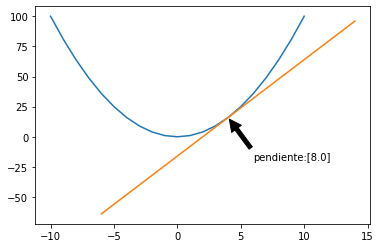

In [ ]:
x_plot = np.arange(-10,11)
y_plot = np.power(x_plot,2)

plt.plot(x_plot,y_plot) # graficar la funcion
plt.plot(x_plot+x_eval,x_plot*valor_derivada + valor_y ) #graficar la recta tangente en el punto dado

plt.annotate("pendiente:{}".format(valor_derivada),(x_eval,valor_y),(x_eval +2,valor_y-35),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

**ejemplo 1 con tf2**

In [2]:
def f(x):
  return tf.math.square(x)
##########################

x  =  tf.constant(4.0)
with tf.GradientTape() as g_tape:
  g_tape.watch(x)
  y = f(x)
dy_dx = g_tape.gradient(y,x)

print(dy_dx)
# si vamos a usar los datos afuera de tf, necesitamos moverlos a numpy
x_numpy = x.numpy()
y_numpy = y.numpy()
dy_dx_numpy = dy_dx.numpy()

tf.Tensor(8.0, shape=(), dtype=float32)


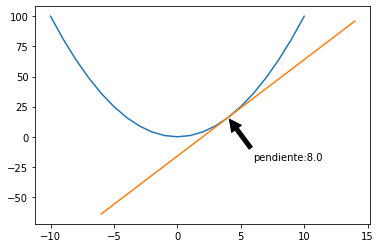

In [ ]:
x_plot = np.arange(-10,11)
y_plot = np.power(x_plot,2)

plt.plot(x_plot,y_plot) # graficar la funcion
plt.plot(x_plot+x_numpy,x_plot*dy_dx_numpy + y_numpy ) #graficar la recta tangente en el punto dado

plt.annotate("pendiente:{}".format(dy_dx_numpy),(x,y_numpy),(x +2,y_numpy-35),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

#### **Ejemplo 2** (composición de funciones)

Dada la función compuesta $f(g(x))$ donde:

$f(g) = 3g^3 + g^2 + 2$

y

$g(x) = x^2 + 1 $

Encontrar la derivada de $f$ respecto de $x$ evaluada en: $x=25$ y $x=6$ 

In [ ]:
def f(g):
  return 3*tf.math.pow(g,3) + tf.math.pow(g,2) + 2

def g(x):
  return tf.math.square(x) + 1


x = tf.placeholder(tf.float32,[])

derivada = tf.gradients(f(g(x)),[x])

with tf.train.MonitoredSession() as session:
  feed_dict = {x:25}
  print("derivada en 25:",session.run(derivada,feed_dict))

  feed_dict = {x:6}
  print("derivada en 6:",session.run(derivada,feed_dict))

AttributeError: ignored

In [3]:




def f(g):
  return 3*tf.math.pow(g,3) + tf.math.pow(g,2) + 2

def g(x):
  return tf.math.square(x) + 1

x1 = tf.constant(25.0)
x2 = tf.constant(6.0)

with tf.GradientTape(persistent=True) as  g_tape:
  g_tape.watch(x1)
  g_tape.watch(x2)

  y1 = f(g(x1))
  y2 = f(g(x2))

  dy_dx1 = g_tape.gradient(y1,x1)
  dy_dx2 = g_tape.gradient(y2,x2)

print("derivada en 25:",dy_dx1)

 
print("derivada en 6:",dy_dx2.numpy())

derivada en 25: tf.Tensor(176406800.0, shape=(), dtype=float32)
derivada en 6: 148740.0


#### **Ejemplo 3** 

Calcular las derivadas parciales respecto de $a$ y $b$ de la función

$e(c(a,b),d(b))$

descrita por el siguiente grafo cuando $a=2$ y $b=1$
<img src="https://drive.google.com/uc?id=12QXjmSFGc1OD-i9dOx-o7mV9Pl7x9a7-">

###### Fuente: Deepmind y UCL

In [ ]:
a = tf.placeholder(tf.float32,[]) #tensor en el grafo sin valor concreto hasta crear la sesion
b = tf.placeholder(tf.float32,[]) #tensor en el grafo sin valor concreto hasta crear la sesion
c = a + b # nodo (op) de suma
d = b + 1
e = c*d

grads = tf.gradients(e,[a,b])

with tf.Session() as session:
  feed_dictionary = {a:2.0 ,b:1.0} # enviar al placeholder "a" el valor 3.0
  print("Derivadas parciales de 'e' respecto de 'a' y 'b':")
  print(session.run(grads , feed_dict=feed_dictionary)) # ejecutar el nodo c, dandole el valor 3.0 a "a"
  
  

Derivadas parciales de 'e' respecto de 'a' y 'b':
[2.0, 5.0]


El mismo ejemplo pero convirtiendo el grafo a composición de funciones:

$e(c(a,b),d(b))$

In [ ]:
def e(c,d):
  return c*d

def c(a,b):
  return a + b

def d(b):
  return b + 1

a = tf.placeholder(tf.float32,[]) 
b = tf.placeholder(tf.float32,[]) 

resultado = e(c(a,b),d(b))

grads = tf.gradients(resultado,[a,b])

with tf.Session() as session:
  feed_dict = {a:2.0,b:1.0} # enviar al placeholder "a" el valor 2.0 y a b el valor de 1.0
  print(session.run([grads,resultado] , feed_dict=feed_dict)) 

[[2.0, 5.0], 6.0]


**Ejemplo 3 en tf2**

In [ ]:
def e(c,d):
  return c*d

def c(a,b):
  return a + b

def d(b):
  return b + 1

a = tf.constant(2.0)
b = tf.constant(1.0) 

with tf.GradientTape() as grad_tape:
  grad_tape.watch(a)
  grad_tape.watch(b)

  resultado = e(c(a,b),d(b))

# grads es una lista de escalares, para convertirlo en el vector gradiente usamos stack
grads = grad_tape.gradient(resultado,[a,b])
grads_vect = tf.stack(grads)

print(resultado)
print(grads)
print(grads_vect)

tf.Tensor(6.0, shape=(), dtype=float32)
[<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]
tf.Tensor([2. 5.], shape=(2,), dtype=float32)


#### Regesión Lineal - Proyecto del curso anterior.

El proyecto anterior se pudo haber resuelto con TensorFlow:



*   Cambiando np.matmul por tf.matmul
*   Definiendo la  función de costo/error con operaciones de tf
*   Calculando los gradientes del error respecto de m y b con tf.gradients
** **Nota**: con el nuevo codigo de tf2 usamos gradienttape y gradient







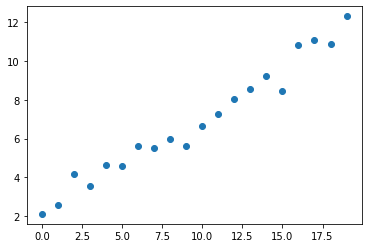

In [6]:
# Generando artificialmente un dataset pequeño

tamaño_muestra = 20
w = 0.5
b = 2

x = np.arange(tamaño_muestra)
y = x*w + b + np.random.normal(loc=0.0,scale=0.5,size=tamaño_muestra)

plt.scatter(x,y)
plt.show()

Función de costo MSE

$J(g) = (1/2)g^2$

$g(h) = h - y$

$h(w_1) = w_1x$



Por que la función de costo esta multiplicada por 1/2 ?

$f(x) = (1/2)x^2$

$f'(x) = x$


En la función $f(x,y)$ dado el punto (a,b) y el vector de dirección $\vec u$

> $\underset{\vec u}{\operatorname{max}}\ \nabla f(a,b)\cdot \vec u $

> $\vec u^* =\underset{\vec u}{\operatorname{argmax}}\ \nabla f(a,b) \cdot \vec u $

De algebra lineal (curso previo) sabemos que el producto punto es máximo cuando los vectores son iguales, por lo tanto la dirección de máximo incremento se tiene cuando:

> $\vec u = \nabla f(a,b)$

El vector gradiente de la función proporciona la dirección de máximo incremento en el punto (a,b)

In [4]:
def error(y_real,y_aprox):
  
  return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox) )

AttributeError: ignored

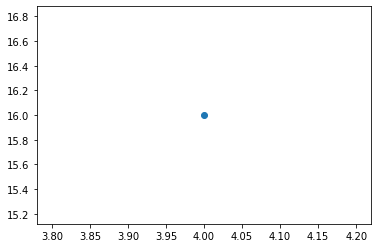

In [5]:
plt.scatter(x,y)

tf.reset_default_graph()

learning_rate = 0.001

m = tf.get_variable("pendiente",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())
b = tf.get_variable("intercepto",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())


tensor_x = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_y")

# hipotesis-modelo y = mx + b
prediccion = tf.add(tf.multiply(m,x),b) # prediccion = tf.linalg.matmul(X,parametros)


gradiente = tf.gradients(error(tensor_y,prediccion) ,[m,b] )


actualizacion_m = tf.assign(m, m - learning_rate*gradiente[0] )
actualizacion_b = tf.assign(b, b - learning_rate*gradiente[1] )
actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b)

# batch gradient descent
with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:x, tensor_y:y}

  for i in range(100):
    print("Gradiente del error respecto de m y b:")
    print(session.run(gradiente,feed_dict=feed_dict))

    session.run(actualizacion_parametros,feed_dict=feed_dict)

    predicciones = session.run(prediccion,feed_dict=feed_dict)
    #print(predicciones)
    plt.plot(x,predicciones,label=str(i))

plt.legend()
plt.show()

##### mismo ejemplo usando un poco de programación orientada a objetos

In [7]:
class ModeloLineal:
  def __init__(self):
    tf.reset_default_graph()
    self.m = tf.get_variable("pendiente",dtype=tf.float32,shape=[],initializer=tf.zeros_initializer())
    self.b = tf.get_variable("intercepto",dtype=tf.float32,shape=[],initializer=tf.zeros_initializer())

  def __call__(self,x):
    return self.m*x + self.b

  def actualizar(self,x,y,learning_rate):
    prediccion = self(x)
    error = 1/2*tf.reduce_mean(tf.math.square(y - prediccion) )
    gradiente = tf.gradients(error,[self.m,self.b])
    actualizacion_m = tf.assign(self.m, self.m - learning_rate*gradiente[0] )
    actualizacion_b = tf.assign(self.b, self.b - learning_rate*gradiente[1] )
    actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b)

    return actualizacion_parametros

AttributeError: ignored

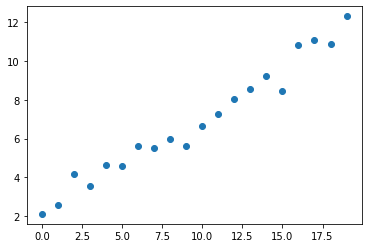

In [8]:
plt.scatter(x,y)

modelo = ModeloLineal()

learning_rate = 0.0001

tensor_x = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_y")

prediccion = modelo(tensor_x)
actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:x, tensor_y:y}

  for i in range(50):
    
    session.run(actualizacion_parametros,feed_dict=feed_dict)

    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(x,predicciones,label=str(i))

  pendiente_final,intercepto_final = session.run([modelo.m,modelo.b],feed_dict=feed_dict)
  plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))

plt.legend()
plt.show()

#### **Mismo ejemplo con el nuevo codigo de tf2**



In [9]:
def h(m,b,x):
  """Modelo/hipotesis"""
  y = m*x + b

  return y

def costo(y_real,y_aprox):
  """Funcion de costo/perdida/error
    para este caso: mean squared error(MSE)
  """
  return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox) )


In [10]:
########### hyper-parametros
lr = 0.001
epochs = 30
########### 

########### parametros entrenables
m = tf.Variable(0.0)
b = tf.Variable(0.0)
###########

errores = [] # almacenara el error de cada iteracion

for i in range(epochs):
  with tf.GradientTape() as grad_tape:
    grad_tape.watch(b)
    grad_tape.watch(m)

    y_pred = h(m,b,x)
    error = costo(y,y_pred)

  # calcular el gradiente de la funcion de costo respecto de los parametros
  grad_m,grad_b = grad_tape.gradient(error,[m,b])

  # actualizar los parametros dando un paso en direccion contraria al gradiente
  m.assign(m - lr*grad_m)
  b.assign(b - lr*grad_b)

  # almacenar o procesar cualquier informacion relevante
  errores.append(error.numpy())
  
  
  print("Iteracion {}, error:{}".format(i,error))
  print("    modelo:y={}x+{}".format(m.numpy(),b.numpy()))

print("Modelo")

Iteracion 0, error:27.860248565673828
    modelo:y=0.08175830543041229x+0.006882958114147186
Iteracion 1, error:21.546585083007812
    modelo:y=0.15335407853126526x+0.012982329353690147
Iteracion 2, error:16.704124450683594
    modelo:y=0.21604982018470764x+0.0183954406529665
Iteracion 3, error:12.990030288696289
    modelo:y=0.27095121145248413x+0.02320753037929535
Iteracion 4, error:10.141356468200684
    modelo:y=0.31902655959129333x+0.027493244037032127
Iteracion 5, error:7.9564361572265625
    modelo:y=0.3611238896846771x+0.03131795674562454
Iteracion 6, error:6.2805914878845215
    modelo:y=0.39798587560653687x+0.034738920629024506
Iteracion 7, error:4.995192527770996
    modelo:y=0.43026289343833923x+0.03780627250671387
Iteracion 8, error:4.0092549324035645
    modelo:y=0.45852455496788025x+0.040563926100730896
Iteracion 9, error:3.2529938220977783
    modelo:y=0.48326972126960754x+0.043050337582826614
Iteracion 10, error:2.672886848449707
    modelo:y=0.5049352049827576x+0.0452

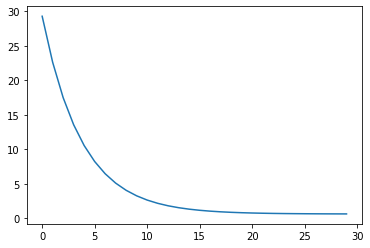

In [ ]:
# graficar la "curva de aprendizaje"
## funcion de costo/perdida/error vs numero de iteracion
## ya queestamos ejecutando gradient DESCENT para minimizar, esta debe disminuir
plt.plot(errores)
plt.show()

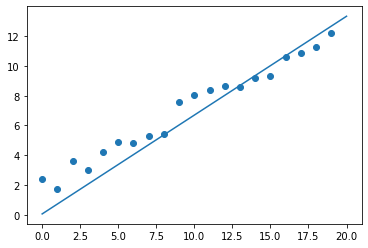

In [ ]:
# graficar la hipotesis/modelo resultante junto a los datos
x_plot = np.linspace(0,20)
y_modelo = m.numpy()*x_plot + b.numpy()

plt.plot(x_plot,y_modelo)
plt.scatter(x,y)
plt.show()

### Optimizadores y otras utilidades de TensorFlow

El calcular gradientes y aplicar actualizaciones con estos son operaciones muy comunes en ML, por lo tanto TensorFlow contiene pre-definidas multiples operaciones y  **componentes de alto nivel** comunes como optimizadores. Por ejemplo:



*   tf.train.GradientDescentOptimizer
*   tf.train.RMSPropOptimizer
*   tf.train.AdamOptimizer

### **Nota**: para las tareas de este curso, aun no es permitido usar estos





INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Gradiente del error respecto de m y b:
[0.0, 0.0]
Gradiente del error respecto de m y b:
[0.16200992, 0.013601184]
Gradiente del error respecto de m y b:
[0.28374496, 0.024096977]
Gradiente del error respecto de m y b:
[0.375212, 0.032258812]
Gradiente del error respecto de m y b:
[0.44393164, 0.03866645]
Gradiente del error respecto de m y b:
[0.49555576, 0.0437556]
Gradiente del error respecto de m y b:
[0.53433204, 0.047853712]
Gradiente del error respecto de m y b:
[0.5634527, 0.05120688]
Gradiente del error respecto de m y b:
[0.5853169, 0.054000046]
Gradiente del error respecto de m y b:
[0.60172755, 0.056372207]
Gradiente del error respecto de m y b:
[0.61403966, 0.05842782]
Gradiente del error respecto de m y b:
[0.62327164, 0.060245395]
Gradiente del error respecto de m y b:
[0.6301888, 0.061883926]
Gradiente del error respecto de m y b:
[0.6353663, 0.0633877

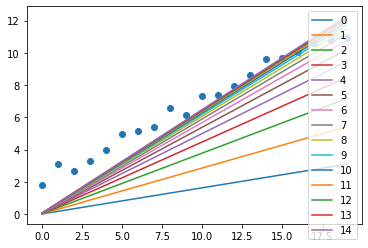

In [ ]:
plt.scatter(x,y)

tf.reset_default_graph()

learning_rate = 0.001

m = tf.get_variable("pendiente",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())
b = tf.get_variable("intercepto",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())

tensor_x = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_y")

prediccion = tf.add(tf.multiply(m,tensor_x),b)
error = tf.losses.mean_squared_error(tensor_y,prediccion)
actualizacion_parametros = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(error)

with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:x, tensor_y:y}

  for i in range(15):
    print("Gradiente del error respecto de m y b:")
    print(session.run([m,b],feed_dict=feed_dict))

    session.run(actualizacion_parametros,feed_dict=feed_dict)

    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(x,predicciones,label=str(i))

plt.legend()
plt.show()

### Variaciones de gradient descent

Gradient descent es el algoritmo de optimizacion base, pero existen otros (y variaciones de este) . Variaciones importantes son:

* **Batch Gradient Descent** : en cada iteracion utiliza todos los datos de entrenamiento para calcular el gradiente (como el promedio de gradientes para cada observacion).
* **Stochastic gradient descent** : se utiliza un unico ejemplo de entreamiento(oservacion) en cada iteracion del algoritmo.
* **Mini-batch gradient descent** : en cada iteracion utiliza una muestra (sin remplazo) del dataset con un tamanio dado como hyper-parametro (normalmente en potencias de 2)

#### Batch Gradient Descent

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


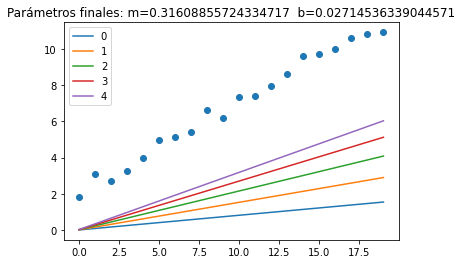

In [ ]:
# tf1
plt.scatter(x,y)

modelo = ModeloLineal()

learning_rate = 0.001

tensor_x = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[tamaño_muestra],"tensor_y")

prediccion = modelo(tensor_x)
actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:x, tensor_y:y}

  for i in range(5): # iteracines = epochs
    
    session.run(actualizacion_parametros,feed_dict=feed_dict)

    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(x,predicciones,label=str(i))

  pendiente_final,intercepto_final = session.run([modelo.m,modelo.b],feed_dict=feed_dict)
  plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))

plt.legend()
plt.show()

In [ ]:
# tf2
########### hyper-parametros
lr = 0.001
epochs = 30
########### 

########### parametros entrenables
m = tf.Variable(0.0)
b = tf.Variable(0.0)
###########

errores = [] # almacenara el error de cada iteracion

for i in range(epochs):
  with tf.GradientTape() as grad_tape:
    grad_tape.watch(b)
    grad_tape.watch(m)

    y_pred = h(m,b,x)
    error = costo(y,y_pred)

  # calcular el gradiente de la funcion de costo respecto de los parametros
  grad_m,grad_b = grad_tape.gradient(error,[m,b])

  # actualizar los parametros dando un paso en direccion contraria al gradiente
  m.assign(m - lr*grad_m)
  b.assign(b - lr*grad_b)

  # almacenar o procesar cualquier informacion relevante
  errores.append(error.numpy())
  
  
  print("Iteracion {}, error:{}".format(i,error))
  print("    modelo:y={}x+{}".format(m.numpy(),b.numpy()))

print("Modelo")

Iteracion 0, error:29.2655086517334
    modelo:y=0.08406978845596313x+0.007003358565270901
Iteracion 1, error:22.59078598022461
    modelo:y=0.15769042074680328x+0.013201050460338593
Iteracion 2, error:17.47141456604004
    modelo:y=0.22216002643108368x+0.018693149089813232
Iteracion 3, error:13.544954299926758
    modelo:y=0.27861547470092773x+0.02356729470193386
Iteracion 4, error:10.533415794372559
    modelo:y=0.3280523717403412x+0.02790023945271969
Iteracion 5, error:8.223596572875977
    modelo:y=0.37134262919425964x+0.031759198755025864
Iteracion 6, error:6.451975345611572
    modelo:y=0.4092499017715454x+0.03520304337143898
Iteracion 7, error:5.093133449554443
    modelo:y=0.4424428939819336x+0.0382833257317543
Iteracion 8, error:4.0508809089660645
    modelo:y=0.4715072810649872x+0.04104519262909889
Iteracion 9, error:3.2514431476593018
    modelo:y=0.4969559907913208x+0.04352818801999092
Iteracion 10, error:2.6382365226745605
    modelo:y=0.5192381739616394x+0.045766934752464

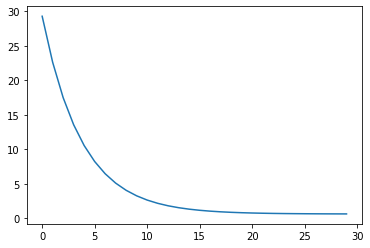

In [ ]:
plt.plot(errores)
plt.show()

#### Stochastic Gradient Descent

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


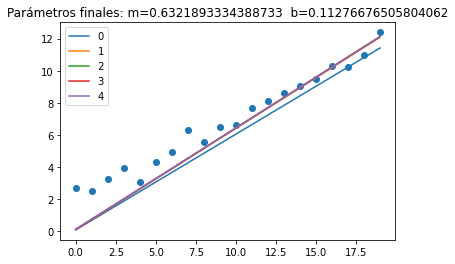

In [ ]:
# tf1
plt.scatter(x,y)

modelo = ModeloLineal()

learning_rate = 0.001

tensor_x = tf.placeholder(tf.float32,[None,1],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[None,1],"tensor_y")

prediccion = modelo(tensor_x)
actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

with tf.train.MonitoredSession() as session:
  
  for i in range(5): #5 epochs
    
    for (x_stoc, y_stoc) in zip(x, y):  #muchas iteraciones por epoch (20)
      x_stoc = np.array([x_stoc]).reshape([1,1])
      y_stoc = np.array([y_stoc]).reshape([1,1])
      feed_dict = {tensor_x:x_stoc, tensor_y:y_stoc}
      session.run(actualizacion_parametros,feed_dict=feed_dict)

    feed_dict = {tensor_x:np.array(x).reshape(-1,1), tensor_y:np.array(y).reshape(-1,1)}
    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(x,predicciones,label=str(i))

  pendiente_final,intercepto_final = session.run([modelo.m,modelo.b],feed_dict=feed_dict)
  plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))

plt.legend()
plt.show()

In [ ]:
########### hyper-parametros
lr = 0.001
epochs = 30
########### 

########### parametros entrenables
m = tf.Variable(0.0)
b = tf.Variable(0.0)
###########

errores = [] # almacenara el error de cada iteracion

for i in range(epochs):
  for (x_stoc, y_stoc) in zip(x, y):  #muchas iteraciones por epoch (20)
    with tf.GradientTape() as grad_tape:
      grad_tape.watch(b)
      grad_tape.watch(m)

      y_pred = h(m,b,x_stoc)
      error = costo(y_stoc,y_pred)

    # calcular el gradiente de la funcion de costo respecto de los parametros
    grad_m,grad_b = grad_tape.gradient(error,[m,b])

    # actualizar los parametros dando un paso en direccion contraria al gradiente
    m.assign(m - lr*grad_m)
    b.assign(b - lr*grad_b)

    # almacenar o procesar cualquier informacion relevante
    errores.append(error.numpy())
  
  
  print("Iteracion {}, error:{}".format(i,error))
  print("    modelo:y={}x+{}".format(m.numpy(),b.numpy()))

print("Modelo")

Iteracion 0, error:0.48454025387763977
    modelo:y=0.6054431796073914x+0.07001572102308273
Iteracion 1, error:0.003064735559746623
    modelo:y=0.6404111385345459x+0.08363291621208191
Iteracion 2, error:0.009579799138009548
    modelo:y=0.6418904066085815x+0.09388880431652069
Iteracion 3, error:0.009758035652339458
    modelo:y=0.6414066553115845x+0.10389731824398041
Iteracion 4, error:0.009458344429731369
    modelo:y=0.6408106684684753x+0.11384157091379166
Iteracion 5, error:0.00913765374571085
    modelo:y=0.6402111649513245x+0.1237325444817543
Iteracion 6, error:0.00882236659526825
    modelo:y=0.6396143436431885x+0.13357116281986237
Iteracion 7, error:0.00851435773074627
    modelo:y=0.6390207409858704x+0.1433577537536621
Iteracion 8, error:0.008213287219405174
    modelo:y=0.6384301781654358x+0.15309256315231323
Iteracion 9, error:0.007919316180050373
    modelo:y=0.6378428339958191x+0.162775918841362
Iteracion 10, error:0.007632116787135601
    modelo:y=0.6372585296630859x+0.17

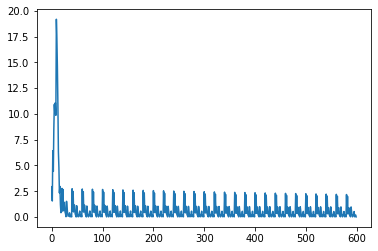

In [ ]:
plt.plot(errores)
plt.show()

#### Mini-batch gradient descent

4
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch 0 iteracion 0 m=0.00660700723528862 b=0.003084498690441251
Epoch 0 iteracion 1 m=0.045934539288282394 b=0.008560308255255222
Epoch 0 iteracion 2 m=0.1363113522529602 b=0.016005001962184906
Epoch 0 iteracion 3 m=0.2792019248008728 b=0.024348746985197067
Epoch 1 iteracion 0 m=0.2840850353240967 b=0.026850491762161255
Epoch 1 iteracion 1 m=0.3090948164463043 b=0.030360188335180283
Epoch 1 iteracion 2 m=0.36078864336013794 b=0.034625157713890076
Epoch 1 iteracion 3 m=0.43803977966308594 b=0.03913416713476181
Epoch 2 iteracion 0 m=0.4419402778148651 b=0.04130345210433006
Epoch 2 iteracion 1 m=0.45879828929901123 b=0.04369371011853218
Epoch 2 iteracion 2 m=0.48847541213035583 b=0.04614890739321709
Epoch 2 iteracion 3 m=0.5283737778663635 b=0.0484757199883461
Epoch 3 iteracion 0 m=0.531713604927063 b=0.0504549965262413
Epoch 3 iteracion 1 m=0.5439291000366211 b=0.052

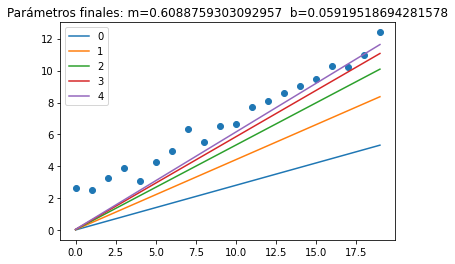

In [ ]:
#tf1
plt.scatter(x,y)

modelo = ModeloLineal()

learning_rate = 0.001
batch_size = 5 # 2, 4, 8  , 16, 32 #hyper-parametro
epochs = 5
total_iteraciones = int(tamaño_muestra/batch_size)

print(total_iteraciones)

tensor_x = tf.placeholder(tf.float32,[None,1],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[None,1],"tensor_y")

prediccion = modelo(tensor_x)
actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

with tf.train.MonitoredSession() as session:
  
  for epoch in range(epochs): #5 epochs
    #shuffle(x,y) # buena practica (ordenar aleatoriamente)
    
    for i in range(total_iteraciones):  #muchas iteraciones por epoch 
      muestra_inicio = i*batch_size
      muestra_fin = muestra_inicio + batch_size
      x_mb =  np.array(x[muestra_inicio:muestra_fin]).reshape([-1,1])
      y_mb = np.array(y[muestra_inicio:muestra_fin]).reshape([-1,1])
      
      feed_dict = {tensor_x:x_mb, tensor_y:y_mb}
      _,m,b = session.run([actualizacion_parametros,modelo.m,modelo.b],feed_dict=feed_dict)

      print("Epoch {} iteracion {} m={} b={}".format(epoch,i,m,b))

    feed_dict = {tensor_x:np.array(x).reshape(-1,1), tensor_y:np.array(y).reshape(-1,1)}
    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(x,predicciones,label=str(epoch))

  pendiente_final,intercepto_final = session.run([modelo.m,modelo.b],feed_dict=feed_dict)
  plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))

plt.legend()
plt.show()

In [ ]:
#tf2
########### hyper-parametros
lr = 0.001
epochs = 200
batch_size = 10
########### 

########### parametros entrenables
m = tf.Variable(0.0)
b = tf.Variable(0.0)
###########

errores = [] # almacenara el error de cada iteracion

total_iteraciones = int(tamaño_muestra/batch_size)
for epoch in range(epochs):
  #shuffle(x,y) # buena practica (ordenar aleatoriamente)
    
    for i in range(total_iteraciones):  #muchas iteraciones por epoch 
      muestra_inicio = i*batch_size
      muestra_fin = muestra_inicio + batch_size
      x_mb =  np.array(x[muestra_inicio:muestra_fin]).reshape([-1,1])
      y_mb = np.array(y[muestra_inicio:muestra_fin]).reshape([-1,1])

      with tf.GradientTape() as grad_tape:
        grad_tape.watch(b)
        grad_tape.watch(m)

        y_pred = h(m,b,x_mb)
        error = costo(y_mb,y_pred)

      # calcular el gradiente de la funcion de costo respecto de los parametros
      grad_m,grad_b = grad_tape.gradient(error,[m,b])

      # actualizar los parametros dando un paso en direccion contraria al gradiente
      m.assign(m - lr*grad_m)
      b.assign(b - lr*grad_b)

      # almacenar o procesar cualquier informacion relevante
      errores.append(error.numpy())
  
  
      print("Iteracion {}, error:{}".format(i,error))
      print("    modelo:y={}x+{}".format(m.numpy(),b.numpy()))

print("Modelo")

Iteracion 0, error:10.564287185668945
    modelo:y=0.023722028359770775x+0.0043048863299191
Iteracion 1, error:44.56206130981445
    modelo:y=0.1628938913345337x+0.013658441603183746
Iteracion 0, error:7.029536247253418
    modelo:y=0.18191197514533997x+0.017216647043824196
Iteracion 1, error:25.189279556274414
    modelo:y=0.2863321304321289x+0.024263538420200348
Iteracion 0, error:4.867316246032715
    modelo:y=0.3017845153808594x+0.027255667373538017
Iteracion 1, error:14.188787460327148
    modelo:y=0.37986695766448975x+0.03255436569452286
Iteracion 0, error:3.5253682136535645
    modelo:y=0.39261627197265625x+0.03511729836463928
Iteracion 1, error:7.966509819030762
    modelo:y=0.45073795318603516x+0.0390910767018795
Iteracion 0, error:2.6787374019622803
    modelo:y=0.46143803000450134x+0.0413285493850708
Iteracion 1, error:4.465464115142822
    modelo:y=0.5044320821762085x+0.0442982017993927
Iteracion 0, error:2.1349105834960938
    modelo:y=0.513578474521637x+0.0462888441979885

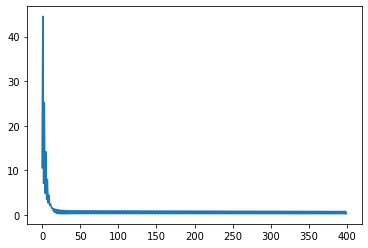

In [ ]:
plt.plot(errores)
plt.show()

**mini-batch** gradient descent es el mas general, los otros 2 se pueden considerar un caso especial de este, por que?